In [ ]:
get_ipython().system_raw("unrar x images.rar")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 54, 54, 64)       

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'images/training/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'images/testing/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1917 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'haseeb': 0, 'noman': 1}

In [ ]:
hist = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
)

Epoch 1/10
15/15 [==============================] - 31s 2s/step - loss: 0.7154 - accuracy: 0.5639 - val_loss: 0.3796 - val_accuracy: 0.9890
Epoch 2/10
15/15 [==============================] - 30s 2s/step - loss: 0.1037 - accuracy: 0.9937 - val_loss: 3.1065e-06 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 30s 2s/step - loss: 0.0500 - accuracy: 0.9901 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 30s 2s/step - loss: 0.0116 - accuracy: 0.9979 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 30s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 30s 2s/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 31s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8437e-04 - val_accuracy: 1.0000
Epoch 8/10
1

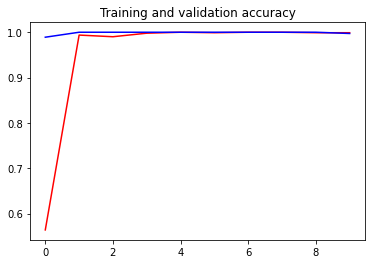

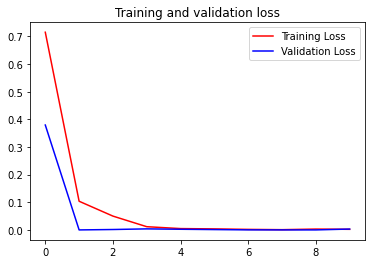

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('friend_recog_model.h5') 

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model('friend_recog_model.h5')

In [ ]:
import numpy as np
from  tensorflow.keras.preprocessing import image

img = image.load_img('/content/images/testing/haseeb/107.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])

classes = model.predict(image, batch_size=10)
print(classes)

[[0.]]
